In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os

In [2]:
dataset = np.load("utils//preprocessed.npz")
x = dataset['x']

In [10]:
discriminator = tf.keras.models.load_model("utils//discriminator.h5")
generator = tf.keras.models.load_model("utils//generator.h5")
gan = tf.keras.models.load_model("utils//gan.h5")

In [11]:
def train(gan, discriminator, generator, EPOCHS, BATCH_SIZE):
    iter_delete = 0
    for epoch in range(EPOCHS):
        batch = x.shape[0] // BATCH_SIZE
        for i in range(batch):
            if (i) % 100 == 0:
                print(f"\t Batch : {i} of {len(x)//BATCH_SIZE}")

            # Generate random seed as input to produce an image
            noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, 100])

            '''
            predict() - eventually go through all the data batch by batch then predict the labels and it also split the batch at a time
            predict_on_batch() - on the other hand this method with assumption thee data only pass to one batch without any split
            '''
            # The generator fake noise prediction will be passed to calculate loss
            gen_image = generator.predict_on_batch(noise)

            # Take real data
            # sampling a batch of real from the dataset
            train_dataset = x[i * BATCH_SIZE:(i + 1) * BATCH_SIZE]

            # Train Discriminator
            # Make the discriminator be able to train
            discriminator.trainable = True

            # Fake labels = 0 and True labels = 1

            # Train the discriminator on real images with real label
            # Returning in loss calculation
            train_labels_real = np.ones(shape=(BATCH_SIZE, 1))
            d_loss_real = discriminator.train_on_batch(train_dataset, train_labels_real)

            # Train the discriminator on fake images with fake labels
            # Returning in loss calculation
            train_labels_fake = np.zeros(shape=(BATCH_SIZE, 1))
            d_loss_fake = discriminator.train_on_batch(gen_image, train_labels_fake)

            # Variables to whole adversarial network
            noise_ = np.random.uniform(-1, 1, size=[BATCH_SIZE, 100])

            # Image label that equal to 1, to fool the discriminator
            train_label_fake_training = np.ones(shape=(BATCH_SIZE, 1))

            # Make the discriminator are not be able to train
            discriminator.trainable = False

            # Train the Generator
            # The discriminator has been freezed and only train generator
            g_loss = gan.train_on_batch(noise_, train_label_fake_training)
        
            if iter_delete == 100:
                os.system('clear')
                iter_delete = 0
            else:
                print("Epoch :%d, batch :%d, d1_real:%.10f, d2_fake:%.10f, g_loss:%.10f" % (epoch, i, d_loss_real, d_loss_fake, g_loss))
                iter_delete = iter_delete + 1
    
    return generator, discriminator, gan

In [12]:
generator, discriminator, gan = train(gan, discriminator, generator, 10, 64)

	 Batch : 0 of 993
Epoch :0, batch :0, d1_real:0.1138420627, d2_fake:19.6791057587, g_loss:0.0000000003
Epoch :0, batch :1, d1_real:0.6755083799, d2_fake:21.3551826477, g_loss:0.0000000002
Epoch :0, batch :2, d1_real:0.7181761265, d2_fake:21.1525650024, g_loss:0.0000000005
Epoch :0, batch :3, d1_real:0.1721309572, d2_fake:20.6962242126, g_loss:0.0000000007
Epoch :0, batch :4, d1_real:0.9675769806, d2_fake:20.1757240295, g_loss:0.0000000010
Epoch :0, batch :5, d1_real:0.6815088987, d2_fake:20.3822364807, g_loss:0.0000000000
Epoch :0, batch :6, d1_real:0.0024906462, d2_fake:20.7759361267, g_loss:0.0000000000
Epoch :0, batch :7, d1_real:0.5591418743, d2_fake:20.2978897095, g_loss:0.0000000000
Epoch :0, batch :8, d1_real:0.3233003616, d2_fake:21.2869625092, g_loss:0.0000000004
Epoch :0, batch :9, d1_real:0.8842772245, d2_fake:20.9703903198, g_loss:0.0000000069
Epoch :0, batch :10, d1_real:0.4475566447, d2_fake:20.3831138611, g_loss:0.0000000015
Epoch :0, batch :11, d1_real:0.3464445472, d2

Epoch :0, batch :96, d1_real:0.0000057448, d2_fake:20.3532886505, g_loss:0.0000000005
Epoch :0, batch :97, d1_real:0.5535455346, d2_fake:20.6266307831, g_loss:0.0000000003
Epoch :0, batch :98, d1_real:1.0759645700, d2_fake:20.9397754669, g_loss:0.0000000002
Epoch :0, batch :99, d1_real:0.2681436241, d2_fake:20.4927310944, g_loss:0.0000000013
	 Batch : 100 of 993
Epoch :0, batch :101, d1_real:0.0779957622, d2_fake:20.4009284973, g_loss:0.0000000001
Epoch :0, batch :102, d1_real:0.4376461506, d2_fake:20.7037963867, g_loss:0.0000000002
Epoch :0, batch :103, d1_real:0.5035368204, d2_fake:20.7913894653, g_loss:0.0000000006
Epoch :0, batch :104, d1_real:0.4432992935, d2_fake:20.5295429230, g_loss:0.0000000001
Epoch :0, batch :105, d1_real:0.4592186809, d2_fake:20.8342094421, g_loss:0.0000000001
Epoch :0, batch :106, d1_real:0.4871257544, d2_fake:20.6957359314, g_loss:0.0000000001
Epoch :0, batch :107, d1_real:0.7108825445, d2_fake:20.6413097382, g_loss:0.0000000001
Epoch :0, batch :108, d1_r

Epoch :0, batch :191, d1_real:0.7810021639, d2_fake:20.7078018188, g_loss:0.0000000018
Epoch :0, batch :192, d1_real:0.6214053035, d2_fake:20.6277694702, g_loss:0.0000000003
Epoch :0, batch :193, d1_real:0.4905280471, d2_fake:21.6191749573, g_loss:0.0000000002
Epoch :0, batch :194, d1_real:0.0018990216, d2_fake:20.7343025208, g_loss:0.0000000005
Epoch :0, batch :195, d1_real:0.0920111239, d2_fake:21.1552181244, g_loss:0.0000000027
Epoch :0, batch :196, d1_real:0.0002825565, d2_fake:20.7385215759, g_loss:0.0000000010
Epoch :0, batch :197, d1_real:0.3987606466, d2_fake:19.8366813660, g_loss:0.0000000176
Epoch :0, batch :198, d1_real:0.5745438337, d2_fake:21.0542907715, g_loss:0.0000000001
Epoch :0, batch :199, d1_real:0.6797977686, d2_fake:19.7530288696, g_loss:0.0000000001
	 Batch : 200 of 993
Epoch :0, batch :200, d1_real:0.2759032249, d2_fake:20.0334053040, g_loss:0.0000000002
Epoch :0, batch :202, d1_real:0.3043418229, d2_fake:20.8964805603, g_loss:0.0000000087
Epoch :0, batch :203, 

Epoch :0, batch :286, d1_real:0.5145127177, d2_fake:21.2308616638, g_loss:0.0000000015
Epoch :0, batch :287, d1_real:0.8999162912, d2_fake:20.3939838409, g_loss:0.0000000002
Epoch :0, batch :288, d1_real:0.4329352379, d2_fake:20.5580215454, g_loss:0.0000000002
Epoch :0, batch :289, d1_real:0.1904236823, d2_fake:20.8478775024, g_loss:0.0000000218
Epoch :0, batch :290, d1_real:0.3269079030, d2_fake:20.7190876007, g_loss:0.0000000001
Epoch :0, batch :291, d1_real:0.2361854464, d2_fake:19.9925003052, g_loss:0.0000000004
Epoch :0, batch :292, d1_real:0.2233605534, d2_fake:21.7119560242, g_loss:0.0000000000
Epoch :0, batch :293, d1_real:0.0562482849, d2_fake:20.6082725525, g_loss:0.0000000004
Epoch :0, batch :294, d1_real:0.7456099987, d2_fake:20.5458946228, g_loss:0.0000000001
Epoch :0, batch :295, d1_real:0.0000013314, d2_fake:21.6145210266, g_loss:0.0000000009
Epoch :0, batch :296, d1_real:0.2058000416, d2_fake:21.0487976074, g_loss:0.0000000004
Epoch :0, batch :297, d1_real:0.0000805353,

Epoch :0, batch :381, d1_real:1.6651659012, d2_fake:21.2327499390, g_loss:0.0000000002
Epoch :0, batch :382, d1_real:0.6995956898, d2_fake:21.4556541443, g_loss:0.0000000003
Epoch :0, batch :383, d1_real:0.1850265265, d2_fake:21.0172615051, g_loss:0.0000000003
Epoch :0, batch :384, d1_real:0.7069371939, d2_fake:20.4196472168, g_loss:0.0000000002
Epoch :0, batch :385, d1_real:0.2149093151, d2_fake:20.4861755371, g_loss:0.0000000002
Epoch :0, batch :386, d1_real:0.4861960709, d2_fake:21.6232776642, g_loss:0.0000000000
Epoch :0, batch :387, d1_real:0.2554254234, d2_fake:20.6447486877, g_loss:0.0000000014
Epoch :0, batch :388, d1_real:0.2413805127, d2_fake:20.7833251953, g_loss:0.0000000096
Epoch :0, batch :389, d1_real:0.7753594518, d2_fake:21.0508918762, g_loss:0.0000000001
Epoch :0, batch :390, d1_real:0.2200496793, d2_fake:20.4798984528, g_loss:0.0000000005
Epoch :0, batch :391, d1_real:0.5716875196, d2_fake:20.3769607544, g_loss:0.0000000002
Epoch :0, batch :392, d1_real:0.0719507039,

Epoch :0, batch :476, d1_real:0.6735816002, d2_fake:20.7646446228, g_loss:0.0000000001
Epoch :0, batch :477, d1_real:0.3117395043, d2_fake:21.2463684082, g_loss:0.0000000001
Epoch :0, batch :478, d1_real:0.2548013330, d2_fake:20.2464675903, g_loss:0.0000000002
Epoch :0, batch :479, d1_real:0.3124720454, d2_fake:21.3601913452, g_loss:0.0000000002
Epoch :0, batch :480, d1_real:0.1648132801, d2_fake:20.6314563751, g_loss:0.0000000007
Epoch :0, batch :481, d1_real:0.0005830425, d2_fake:20.8463973999, g_loss:0.0000000091
Epoch :0, batch :482, d1_real:1.1497466564, d2_fake:20.6745719910, g_loss:0.0000000012
Epoch :0, batch :483, d1_real:0.7497776747, d2_fake:20.8257274628, g_loss:0.0000000015
Epoch :0, batch :484, d1_real:0.3353314400, d2_fake:21.2900085449, g_loss:0.0000000018
Epoch :0, batch :485, d1_real:0.0782789588, d2_fake:20.9220619202, g_loss:0.0000000000
Epoch :0, batch :486, d1_real:1.3554735184, d2_fake:20.0368003845, g_loss:0.0000000004
Epoch :0, batch :487, d1_real:0.6625012159,

Epoch :0, batch :571, d1_real:0.3199783266, d2_fake:20.7229671478, g_loss:0.0000000001
Epoch :0, batch :572, d1_real:0.4794185460, d2_fake:20.4950237274, g_loss:0.0000000028
Epoch :0, batch :573, d1_real:0.0633776337, d2_fake:21.4760246277, g_loss:0.0000000001
Epoch :0, batch :574, d1_real:0.4330394864, d2_fake:21.1111354828, g_loss:0.0000000003
Epoch :0, batch :575, d1_real:1.3499076366, d2_fake:21.8093147278, g_loss:0.0000000010
Epoch :0, batch :576, d1_real:0.8498891592, d2_fake:20.3531131744, g_loss:0.0000000000
Epoch :0, batch :577, d1_real:2.5781347752, d2_fake:20.5308303833, g_loss:0.0000000004
Epoch :0, batch :578, d1_real:1.3997955322, d2_fake:20.0860748291, g_loss:0.0000000002
Epoch :0, batch :579, d1_real:0.1343219429, d2_fake:20.5172309875, g_loss:0.0000000001
Epoch :0, batch :580, d1_real:0.7897289991, d2_fake:21.0091781616, g_loss:0.0000000001
Epoch :0, batch :581, d1_real:0.3165502846, d2_fake:20.6305828094, g_loss:0.0000000001
Epoch :0, batch :582, d1_real:0.6735763550,

Epoch :0, batch :666, d1_real:0.5402567387, d2_fake:21.0749359131, g_loss:0.0000000007
Epoch :0, batch :667, d1_real:0.5153279901, d2_fake:21.5941696167, g_loss:0.0000000013
Epoch :0, batch :668, d1_real:0.0984845161, d2_fake:20.8232307434, g_loss:0.0000000000
Epoch :0, batch :669, d1_real:0.5875474215, d2_fake:21.4002552032, g_loss:0.0000000008
Epoch :0, batch :670, d1_real:0.6454286575, d2_fake:20.3496246338, g_loss:0.0000000000
Epoch :0, batch :671, d1_real:0.0000005913, d2_fake:20.1351661682, g_loss:0.0000000000
Epoch :0, batch :672, d1_real:0.5387390256, d2_fake:21.3804054260, g_loss:0.0000000001
Epoch :0, batch :673, d1_real:0.0675045252, d2_fake:20.4654483795, g_loss:0.0000000001
Epoch :0, batch :674, d1_real:0.0807913914, d2_fake:21.3697147369, g_loss:0.0000000011
Epoch :0, batch :675, d1_real:0.5210221410, d2_fake:20.5518417358, g_loss:0.0000000001
Epoch :0, batch :676, d1_real:0.1475865394, d2_fake:21.9410858154, g_loss:0.0000000046
Epoch :0, batch :677, d1_real:1.1654770374,

Epoch :0, batch :761, d1_real:0.8749499321, d2_fake:20.6535358429, g_loss:0.0000000002
Epoch :0, batch :762, d1_real:0.6840631962, d2_fake:20.8165302277, g_loss:0.0000000001
Epoch :0, batch :763, d1_real:0.1828324199, d2_fake:21.0918846130, g_loss:0.0000000003
Epoch :0, batch :764, d1_real:0.1018529311, d2_fake:20.4372959137, g_loss:0.0000000003
Epoch :0, batch :765, d1_real:2.1266946793, d2_fake:20.8650207520, g_loss:0.0000000001
Epoch :0, batch :766, d1_real:0.5973190069, d2_fake:21.8294620514, g_loss:0.0000000000
Epoch :0, batch :767, d1_real:0.6602423787, d2_fake:20.3822631836, g_loss:0.0000000001
Epoch :0, batch :768, d1_real:0.7613458633, d2_fake:20.7181224823, g_loss:0.0000000004
Epoch :0, batch :769, d1_real:1.0743734837, d2_fake:20.7385177612, g_loss:0.0000000002
Epoch :0, batch :770, d1_real:0.9976176023, d2_fake:21.0314788818, g_loss:0.0000000003
Epoch :0, batch :771, d1_real:1.2562850714, d2_fake:20.4478645325, g_loss:0.0000000001
Epoch :0, batch :772, d1_real:0.0053370921,

Epoch :0, batch :856, d1_real:0.0000165023, d2_fake:20.6617622375, g_loss:0.0000000001
Epoch :0, batch :857, d1_real:0.1955643296, d2_fake:20.4132614136, g_loss:0.0000000000
Epoch :0, batch :858, d1_real:1.2789096832, d2_fake:19.9156227112, g_loss:0.0000000000
Epoch :0, batch :859, d1_real:0.9161506295, d2_fake:20.6191692352, g_loss:0.0000000003
Epoch :0, batch :860, d1_real:0.4825949073, d2_fake:20.6873779297, g_loss:0.0000000005
Epoch :0, batch :861, d1_real:0.9007509351, d2_fake:21.5175514221, g_loss:0.0000000002
Epoch :0, batch :862, d1_real:1.3188477755, d2_fake:20.8714675903, g_loss:0.0000000006
Epoch :0, batch :863, d1_real:0.3293916583, d2_fake:20.4870815277, g_loss:0.0000000009
Epoch :0, batch :864, d1_real:0.5065948367, d2_fake:20.9860877991, g_loss:0.0000000004
Epoch :0, batch :865, d1_real:0.2259519696, d2_fake:21.1540374756, g_loss:0.0000000002
Epoch :0, batch :866, d1_real:0.1217326298, d2_fake:20.6989898682, g_loss:0.0000000004
Epoch :0, batch :867, d1_real:0.0003190383,

Epoch :0, batch :951, d1_real:0.0209969245, d2_fake:19.8432769775, g_loss:0.0000000002
Epoch :0, batch :952, d1_real:0.4494643509, d2_fake:20.8204612732, g_loss:0.0000000006
Epoch :0, batch :953, d1_real:0.8290681839, d2_fake:21.3429450989, g_loss:0.0000000002
Epoch :0, batch :954, d1_real:0.1802061200, d2_fake:20.2720088959, g_loss:0.0000000002
Epoch :0, batch :955, d1_real:0.2561354339, d2_fake:20.6274604797, g_loss:0.0000000001
Epoch :0, batch :956, d1_real:0.2738344073, d2_fake:21.3140640259, g_loss:0.0000000003
Epoch :0, batch :957, d1_real:0.7328447104, d2_fake:21.0140037537, g_loss:0.0000000006
Epoch :0, batch :958, d1_real:0.8775324225, d2_fake:20.6319046021, g_loss:0.0000000000
Epoch :0, batch :959, d1_real:0.8768934608, d2_fake:20.7001419067, g_loss:0.0000000006
Epoch :0, batch :960, d1_real:0.3767162263, d2_fake:20.8525753021, g_loss:0.0000000010
Epoch :0, batch :961, d1_real:0.5230695605, d2_fake:21.2455368042, g_loss:0.0000000002
Epoch :0, batch :962, d1_real:0.8080651760,

Epoch :1, batch :54, d1_real:0.5372083783, d2_fake:20.7995147705, g_loss:0.0000000007
Epoch :1, batch :55, d1_real:0.6754409671, d2_fake:20.4195098877, g_loss:0.0000000000
Epoch :1, batch :56, d1_real:0.2211578190, d2_fake:20.3554344177, g_loss:0.0000000001
Epoch :1, batch :57, d1_real:0.1922382116, d2_fake:20.5721626282, g_loss:0.0000000001
Epoch :1, batch :58, d1_real:0.2303008884, d2_fake:20.7660980225, g_loss:0.0000000001
Epoch :1, batch :59, d1_real:0.3497979641, d2_fake:20.8729133606, g_loss:0.0000000002
Epoch :1, batch :60, d1_real:0.0315496661, d2_fake:21.3955688477, g_loss:0.0000000005
Epoch :1, batch :61, d1_real:0.6242774725, d2_fake:20.9773521423, g_loss:0.0000000017
Epoch :1, batch :62, d1_real:0.2463054955, d2_fake:20.7840366364, g_loss:0.0000000000
Epoch :1, batch :63, d1_real:0.0759366304, d2_fake:21.1702785492, g_loss:0.0000000002
Epoch :1, batch :64, d1_real:0.0793005824, d2_fake:21.0716781616, g_loss:0.0000000003
Epoch :1, batch :65, d1_real:0.0953087807, d2_fake:20.

Epoch :1, batch :150, d1_real:0.1454590559, d2_fake:21.5211448669, g_loss:0.0000000001
Epoch :1, batch :151, d1_real:0.0000040044, d2_fake:19.9282264709, g_loss:0.0000000001
Epoch :1, batch :152, d1_real:0.3028213978, d2_fake:20.1473560333, g_loss:0.0000000007
Epoch :1, batch :153, d1_real:0.5129754543, d2_fake:20.1869544983, g_loss:0.0000000003
Epoch :1, batch :154, d1_real:0.1427928805, d2_fake:20.5219573975, g_loss:0.0000000029
Epoch :1, batch :155, d1_real:0.4018544257, d2_fake:21.2703056335, g_loss:0.0000000001
Epoch :1, batch :156, d1_real:0.0899508595, d2_fake:20.9612541199, g_loss:0.0000000004
Epoch :1, batch :157, d1_real:0.0000000950, d2_fake:20.0734119415, g_loss:0.0000000001
Epoch :1, batch :158, d1_real:0.2194564342, d2_fake:20.5799446106, g_loss:0.0000000002
Epoch :1, batch :159, d1_real:0.8449195623, d2_fake:21.1868019104, g_loss:0.0000000002
Epoch :1, batch :160, d1_real:0.0003130072, d2_fake:21.5009727478, g_loss:0.0000000001
Epoch :1, batch :161, d1_real:0.1330409944,

Epoch :1, batch :245, d1_real:0.7134506702, d2_fake:20.6237525940, g_loss:0.0000000003
Epoch :1, batch :246, d1_real:0.2349137962, d2_fake:20.4639625549, g_loss:0.0000000001
Epoch :1, batch :247, d1_real:0.0000532903, d2_fake:21.4034538269, g_loss:0.0000000001
Epoch :1, batch :248, d1_real:1.5686532259, d2_fake:20.8925971985, g_loss:0.0000000000
Epoch :1, batch :249, d1_real:0.2761869133, d2_fake:20.7498626709, g_loss:0.0000000003
Epoch :1, batch :250, d1_real:0.1300848722, d2_fake:20.6467742920, g_loss:0.0000000004
Epoch :1, batch :251, d1_real:0.1658658683, d2_fake:20.7842102051, g_loss:0.0000000001
Epoch :1, batch :252, d1_real:0.5484494567, d2_fake:20.4662227631, g_loss:0.0000000001
Epoch :1, batch :253, d1_real:0.1311567277, d2_fake:21.1634216309, g_loss:0.0000000002
Epoch :1, batch :254, d1_real:0.3904474974, d2_fake:20.8787899017, g_loss:0.0000000010
Epoch :1, batch :255, d1_real:0.2723271847, d2_fake:20.7272834778, g_loss:0.0000000001
Epoch :1, batch :256, d1_real:0.0000002512,

Epoch :1, batch :340, d1_real:0.1879937202, d2_fake:21.3019905090, g_loss:0.0000000001
Epoch :1, batch :341, d1_real:0.6466699243, d2_fake:20.4837455750, g_loss:0.0000000001
Epoch :1, batch :342, d1_real:0.3851836920, d2_fake:21.0744934082, g_loss:0.0000000003
Epoch :1, batch :343, d1_real:0.6819531322, d2_fake:20.9032020569, g_loss:0.0000000002
Epoch :1, batch :344, d1_real:0.8391003609, d2_fake:21.2944774628, g_loss:0.0000000001
Epoch :1, batch :345, d1_real:0.6586668491, d2_fake:20.4213733673, g_loss:0.0000000002
Epoch :1, batch :346, d1_real:0.0016826671, d2_fake:21.0427970886, g_loss:0.0000000003
Epoch :1, batch :347, d1_real:0.6290106773, d2_fake:20.7424201965, g_loss:0.0000000000
Epoch :1, batch :348, d1_real:0.3779494464, d2_fake:21.0147533417, g_loss:0.0000000002
Epoch :1, batch :349, d1_real:0.5935773849, d2_fake:20.5509815216, g_loss:0.0000000002
Epoch :1, batch :350, d1_real:0.0955825895, d2_fake:20.7423210144, g_loss:0.0000000002
Epoch :1, batch :351, d1_real:0.0085364683,

Epoch :1, batch :435, d1_real:0.4311258495, d2_fake:21.2449283600, g_loss:0.0000000001
Epoch :1, batch :436, d1_real:0.0623301156, d2_fake:20.7509937286, g_loss:0.0000000001
Epoch :1, batch :437, d1_real:0.8196609020, d2_fake:20.7361240387, g_loss:0.0000000001
Epoch :1, batch :438, d1_real:0.3951450586, d2_fake:20.1560020447, g_loss:0.0000000001
Epoch :1, batch :439, d1_real:1.5811636448, d2_fake:20.1424846649, g_loss:0.0000000001
Epoch :1, batch :440, d1_real:0.0000000281, d2_fake:21.0071411133, g_loss:0.0000000001
Epoch :1, batch :441, d1_real:0.3840892613, d2_fake:20.7607688904, g_loss:0.0000000001
Epoch :1, batch :442, d1_real:0.8081415296, d2_fake:20.7211875916, g_loss:0.0000000039
Epoch :1, batch :443, d1_real:0.1584044546, d2_fake:20.1416015625, g_loss:0.0000000005
Epoch :1, batch :444, d1_real:0.3660840094, d2_fake:20.7722644806, g_loss:0.0000000004
Epoch :1, batch :445, d1_real:0.3748485446, d2_fake:20.9087944031, g_loss:0.0000000001
Epoch :1, batch :446, d1_real:0.4979713559,

Epoch :1, batch :530, d1_real:0.5095998049, d2_fake:20.0948829651, g_loss:0.0000000005
Epoch :1, batch :531, d1_real:0.8478304744, d2_fake:20.2187099457, g_loss:0.0000000002
Epoch :1, batch :532, d1_real:0.6626988053, d2_fake:21.1757965088, g_loss:0.0000000006
Epoch :1, batch :533, d1_real:0.6184968352, d2_fake:20.5021247864, g_loss:0.0000000002
Epoch :1, batch :534, d1_real:0.7002525926, d2_fake:21.3160991669, g_loss:0.0000000002
Epoch :1, batch :535, d1_real:0.6520081758, d2_fake:20.7368812561, g_loss:0.0000000003
Epoch :1, batch :536, d1_real:0.5617339015, d2_fake:21.1445960999, g_loss:0.0000000001
Epoch :1, batch :537, d1_real:0.4243120551, d2_fake:19.5251197815, g_loss:0.0000000001
Epoch :1, batch :538, d1_real:0.4092143774, d2_fake:20.8498840332, g_loss:0.0000000013
Epoch :1, batch :539, d1_real:0.9087368250, d2_fake:21.3072910309, g_loss:0.0000000008
Epoch :1, batch :540, d1_real:0.0182572212, d2_fake:21.3364868164, g_loss:0.0000000001
Epoch :1, batch :541, d1_real:0.4723936319,

Epoch :1, batch :625, d1_real:0.2580089271, d2_fake:20.6057529449, g_loss:0.0000000004
Epoch :1, batch :626, d1_real:0.5564644337, d2_fake:20.9670066833, g_loss:0.0000000003
Epoch :1, batch :627, d1_real:0.0014390321, d2_fake:21.0611763000, g_loss:0.0000000007
Epoch :1, batch :628, d1_real:0.0008107204, d2_fake:21.3329696655, g_loss:0.0000000031
Epoch :1, batch :629, d1_real:0.4212082028, d2_fake:20.2029457092, g_loss:0.0000000007
Epoch :1, batch :630, d1_real:0.5500172377, d2_fake:20.8438396454, g_loss:0.0000000000
Epoch :1, batch :631, d1_real:0.2190662324, d2_fake:20.5637149811, g_loss:0.0000000003
Epoch :1, batch :632, d1_real:0.1438655853, d2_fake:21.0177803040, g_loss:0.0000000001
Epoch :1, batch :633, d1_real:0.0217206832, d2_fake:20.6048221588, g_loss:0.0000000000
Epoch :1, batch :634, d1_real:0.3955864906, d2_fake:20.7741699219, g_loss:0.0000000001
Epoch :1, batch :635, d1_real:0.4075086415, d2_fake:21.3259162903, g_loss:0.0000000001
Epoch :1, batch :636, d1_real:0.3959102929,

Epoch :1, batch :719, d1_real:0.1070930064, d2_fake:22.2300071716, g_loss:0.0000000001
Epoch :1, batch :720, d1_real:0.6643587351, d2_fake:20.4534587860, g_loss:0.0000000000
Epoch :1, batch :721, d1_real:0.9578543901, d2_fake:20.6833000183, g_loss:0.0000000003
Epoch :1, batch :722, d1_real:0.8282026649, d2_fake:21.0208168030, g_loss:0.0000000003
Epoch :1, batch :724, d1_real:0.9528641105, d2_fake:20.1992092133, g_loss:0.0000000001
Epoch :1, batch :725, d1_real:0.0988184214, d2_fake:20.5667991638, g_loss:0.0000000001
Epoch :1, batch :726, d1_real:0.3792338669, d2_fake:21.2024040222, g_loss:0.0000000002
Epoch :1, batch :727, d1_real:0.1759223491, d2_fake:21.3453769684, g_loss:0.0000000004
Epoch :1, batch :728, d1_real:0.9877314568, d2_fake:20.8964519501, g_loss:0.0000000003
Epoch :1, batch :729, d1_real:0.7247462869, d2_fake:21.2768459320, g_loss:0.0000000002
Epoch :1, batch :730, d1_real:1.3976185322, d2_fake:20.9373970032, g_loss:0.0000000001
Epoch :1, batch :731, d1_real:1.1737768650,

Epoch :1, batch :814, d1_real:0.0480946042, d2_fake:20.4359970093, g_loss:0.0000000003
Epoch :1, batch :815, d1_real:0.5700911880, d2_fake:20.2579097748, g_loss:0.0000000001
Epoch :1, batch :816, d1_real:0.5160931349, d2_fake:21.7770690918, g_loss:0.0000000002
Epoch :1, batch :817, d1_real:0.0301380269, d2_fake:20.3323554993, g_loss:0.0000000006
Epoch :1, batch :818, d1_real:0.8324577212, d2_fake:20.8052654266, g_loss:0.0000000005
Epoch :1, batch :819, d1_real:0.2417367548, d2_fake:21.4212341309, g_loss:0.0000000001
Epoch :1, batch :820, d1_real:0.2320962399, d2_fake:20.6106147766, g_loss:0.0000000000
Epoch :1, batch :821, d1_real:0.6815868616, d2_fake:21.2116241455, g_loss:0.0000000001
Epoch :1, batch :822, d1_real:0.0003246211, d2_fake:20.5797634125, g_loss:0.0000000008
Epoch :1, batch :823, d1_real:0.6039500833, d2_fake:20.2195434570, g_loss:0.0000000002
Epoch :1, batch :825, d1_real:0.3664196730, d2_fake:21.6338615417, g_loss:0.0000000001
Epoch :1, batch :826, d1_real:0.4018588960,

Epoch :1, batch :909, d1_real:0.0566861890, d2_fake:20.1755046844, g_loss:0.0000000009
Epoch :1, batch :910, d1_real:0.2490946651, d2_fake:20.7115859985, g_loss:0.0000000018
Epoch :1, batch :911, d1_real:0.2970343232, d2_fake:20.3632850647, g_loss:0.0000000000
Epoch :1, batch :912, d1_real:0.1059891433, d2_fake:20.0818481445, g_loss:0.0000000009
Epoch :1, batch :913, d1_real:0.4907115996, d2_fake:20.4594917297, g_loss:0.0000000001
Epoch :1, batch :914, d1_real:0.7733377218, d2_fake:20.2456436157, g_loss:0.0000000001
Epoch :1, batch :915, d1_real:0.9438454509, d2_fake:20.1404132843, g_loss:0.0000000001
Epoch :1, batch :916, d1_real:0.6253240705, d2_fake:20.6066684723, g_loss:0.0000000007
Epoch :1, batch :917, d1_real:1.3649814129, d2_fake:20.6994075775, g_loss:0.0000000001
Epoch :1, batch :918, d1_real:0.0000000097, d2_fake:20.2145652771, g_loss:0.0000000002
Epoch :1, batch :919, d1_real:0.2921435833, d2_fake:20.9815597534, g_loss:0.0000000001
Epoch :1, batch :920, d1_real:1.1770160198,

Epoch :2, batch :12, d1_real:0.3264457583, d2_fake:20.5345230103, g_loss:0.0000000001
Epoch :2, batch :13, d1_real:0.7937735319, d2_fake:20.7138862610, g_loss:0.0000000002
Epoch :2, batch :14, d1_real:0.1925125420, d2_fake:21.0115890503, g_loss:0.0000000001
Epoch :2, batch :15, d1_real:0.7038553953, d2_fake:21.5025138855, g_loss:0.0000000000
Epoch :2, batch :16, d1_real:0.6905881763, d2_fake:19.9018917084, g_loss:0.0000000000
Epoch :2, batch :17, d1_real:0.5434958339, d2_fake:21.2147426605, g_loss:0.0000000001
Epoch :2, batch :18, d1_real:0.8039313555, d2_fake:20.1657657623, g_loss:0.0000000003
Epoch :2, batch :19, d1_real:1.6940826178, d2_fake:20.6233730316, g_loss:0.0000000000
Epoch :2, batch :20, d1_real:0.0171258636, d2_fake:20.5416221619, g_loss:0.0000000001
Epoch :2, batch :21, d1_real:0.0229393616, d2_fake:20.5407657623, g_loss:0.0000000000
Epoch :2, batch :22, d1_real:0.0002998987, d2_fake:20.6582031250, g_loss:0.0000000003
Epoch :2, batch :23, d1_real:0.0656201094, d2_fake:20.

Epoch :2, batch :108, d1_real:0.0701552331, d2_fake:20.4115257263, g_loss:0.0000000014
Epoch :2, batch :109, d1_real:0.4209987521, d2_fake:20.7332267761, g_loss:0.0000000002
Epoch :2, batch :110, d1_real:0.6051181555, d2_fake:20.4752845764, g_loss:0.0000000000
Epoch :2, batch :111, d1_real:1.0229284763, d2_fake:21.1114940643, g_loss:0.0000000001
Epoch :2, batch :112, d1_real:0.7726581097, d2_fake:20.5648078918, g_loss:0.0000000001
Epoch :2, batch :113, d1_real:0.3167650700, d2_fake:20.4842643738, g_loss:0.0000000000
Epoch :2, batch :114, d1_real:0.3906418085, d2_fake:20.4103927612, g_loss:0.0000000002
Epoch :2, batch :115, d1_real:0.6867601275, d2_fake:21.3718643188, g_loss:0.0000000001
Epoch :2, batch :116, d1_real:0.1201405972, d2_fake:21.6227226257, g_loss:0.0000000058
Epoch :2, batch :117, d1_real:0.0097252978, d2_fake:20.8480262756, g_loss:0.0000000001
Epoch :2, batch :118, d1_real:0.1896817684, d2_fake:21.3439540863, g_loss:0.0000000000
Epoch :2, batch :119, d1_real:0.7973672748,

Epoch :2, batch :203, d1_real:0.7168155909, d2_fake:20.9638061523, g_loss:0.0000000001
Epoch :2, batch :204, d1_real:0.8715359569, d2_fake:21.8681144714, g_loss:0.0000000002
Epoch :2, batch :205, d1_real:0.1558911502, d2_fake:20.7693634033, g_loss:0.0000000007
Epoch :2, batch :206, d1_real:0.9689761400, d2_fake:20.2681541443, g_loss:0.0000000013
Epoch :2, batch :207, d1_real:0.5803472400, d2_fake:19.4984970093, g_loss:0.0000000001
Epoch :2, batch :208, d1_real:0.2915781438, d2_fake:20.3207168579, g_loss:0.0000000004
Epoch :2, batch :209, d1_real:0.7517129779, d2_fake:20.2019538879, g_loss:0.0000000001
Epoch :2, batch :210, d1_real:0.5436794162, d2_fake:19.9029159546, g_loss:0.0000000000
Epoch :2, batch :211, d1_real:0.8091430664, d2_fake:20.5501270294, g_loss:0.0000000002
Epoch :2, batch :212, d1_real:0.5235153437, d2_fake:20.4243354797, g_loss:0.0000000001
Epoch :2, batch :213, d1_real:0.6010153890, d2_fake:19.8984127045, g_loss:0.0000000000
Epoch :2, batch :214, d1_real:0.9874034524,

Epoch :2, batch :299, d1_real:0.3980837166, d2_fake:20.5286979675, g_loss:0.0000000003
	 Batch : 300 of 993
Epoch :2, batch :300, d1_real:0.2385612577, d2_fake:21.5143642426, g_loss:0.0000000003
Epoch :2, batch :301, d1_real:1.1642659903, d2_fake:20.8626174927, g_loss:0.0000000000
Epoch :2, batch :302, d1_real:0.8655252457, d2_fake:20.2485733032, g_loss:0.0000000000
Epoch :2, batch :303, d1_real:0.2346526384, d2_fake:21.1526603699, g_loss:0.0000000001
Epoch :2, batch :304, d1_real:1.4547094107, d2_fake:20.5296211243, g_loss:0.0000000001
Epoch :2, batch :305, d1_real:0.0003180024, d2_fake:21.2653083801, g_loss:0.0000000001
Epoch :2, batch :306, d1_real:0.9023820162, d2_fake:20.2723617554, g_loss:0.0000000005
Epoch :2, batch :307, d1_real:0.5761001110, d2_fake:21.7989215851, g_loss:0.0000000000
Epoch :2, batch :308, d1_real:0.5537068844, d2_fake:20.6789016724, g_loss:0.0000000001
Epoch :2, batch :309, d1_real:0.5157518387, d2_fake:20.3743286133, g_loss:0.0000000000
Epoch :2, batch :310, 

Epoch :2, batch :394, d1_real:0.3668107092, d2_fake:21.2710113525, g_loss:0.0000000001
Epoch :2, batch :395, d1_real:0.3533705473, d2_fake:20.7088489532, g_loss:0.0000000002
Epoch :2, batch :396, d1_real:0.4987305403, d2_fake:20.4330978394, g_loss:0.0000000002
Epoch :2, batch :397, d1_real:0.0956870988, d2_fake:21.1769371033, g_loss:0.0000000000
Epoch :2, batch :398, d1_real:0.4079996049, d2_fake:20.5907211304, g_loss:0.0000000002
Epoch :2, batch :399, d1_real:0.0849134848, d2_fake:20.6308403015, g_loss:0.0000000008
	 Batch : 400 of 993
Epoch :2, batch :400, d1_real:0.0731477588, d2_fake:20.3460884094, g_loss:0.0000000001
Epoch :2, batch :401, d1_real:0.4505855441, d2_fake:19.9438114166, g_loss:0.0000000001
Epoch :2, batch :402, d1_real:0.2854153514, d2_fake:20.0552558899, g_loss:0.0000000001
Epoch :2, batch :403, d1_real:0.8813316822, d2_fake:20.0862960815, g_loss:0.0000000023
Epoch :2, batch :404, d1_real:0.3693526089, d2_fake:20.3036746979, g_loss:0.0000000000
Epoch :2, batch :405, 

Epoch :2, batch :489, d1_real:0.3461310863, d2_fake:19.7000694275, g_loss:0.0000000001
Epoch :2, batch :490, d1_real:1.0147786140, d2_fake:20.5579910278, g_loss:0.0000000000
Epoch :2, batch :491, d1_real:0.2399778813, d2_fake:20.9724025726, g_loss:0.0000000034
Epoch :2, batch :492, d1_real:0.3151153922, d2_fake:20.4853057861, g_loss:0.0000000001
Epoch :2, batch :493, d1_real:0.4415579736, d2_fake:20.3564224243, g_loss:0.0000000004
Epoch :2, batch :494, d1_real:1.1029551029, d2_fake:21.2714385986, g_loss:0.0000000003
Epoch :2, batch :495, d1_real:0.3867609799, d2_fake:20.9179649353, g_loss:0.0000000001
Epoch :2, batch :496, d1_real:0.7212749124, d2_fake:20.5814170837, g_loss:0.0000000005
Epoch :2, batch :497, d1_real:0.4129334092, d2_fake:21.3516578674, g_loss:0.0000000002
Epoch :2, batch :498, d1_real:1.7241196632, d2_fake:20.9546318054, g_loss:0.0000000001
Epoch :2, batch :499, d1_real:0.7371968627, d2_fake:20.9825000763, g_loss:0.0000000002
	 Batch : 500 of 993
Epoch :2, batch :500, 

Epoch :2, batch :584, d1_real:0.4319899678, d2_fake:20.5481376648, g_loss:0.0000000000
Epoch :2, batch :585, d1_real:0.9361294508, d2_fake:20.8078041077, g_loss:0.0000000002
Epoch :2, batch :586, d1_real:0.5469523668, d2_fake:20.7263355255, g_loss:0.0000000002
Epoch :2, batch :587, d1_real:0.6099678278, d2_fake:21.2156581879, g_loss:0.0000000041
Epoch :2, batch :588, d1_real:1.2202980518, d2_fake:20.5678997040, g_loss:0.0000000001
Epoch :2, batch :589, d1_real:0.7075316906, d2_fake:19.4855155945, g_loss:0.0000000000
Epoch :2, batch :590, d1_real:0.5400194526, d2_fake:19.9807949066, g_loss:0.0000000047
Epoch :2, batch :591, d1_real:0.1961422116, d2_fake:20.4288368225, g_loss:0.0000000007
Epoch :2, batch :592, d1_real:0.1619929969, d2_fake:19.7130126953, g_loss:0.0000000000
Epoch :2, batch :593, d1_real:1.8683165312, d2_fake:21.2615413666, g_loss:0.0000000009
Epoch :2, batch :594, d1_real:0.1884486526, d2_fake:20.4853668213, g_loss:0.0000000004
Epoch :2, batch :595, d1_real:0.0000649231,

Epoch :2, batch :679, d1_real:0.9441486001, d2_fake:20.9956436157, g_loss:0.0000000001
Epoch :2, batch :680, d1_real:1.1200277805, d2_fake:19.4261512756, g_loss:0.0000000002
Epoch :2, batch :681, d1_real:1.2727395296, d2_fake:21.6600952148, g_loss:0.0000000001
Epoch :2, batch :682, d1_real:0.4570080340, d2_fake:19.7175521851, g_loss:0.0000000001
Epoch :2, batch :683, d1_real:0.9685868621, d2_fake:21.2695922852, g_loss:0.0000000001
Epoch :2, batch :684, d1_real:0.4464197457, d2_fake:20.1454372406, g_loss:0.0000000002
Epoch :2, batch :685, d1_real:0.4256194234, d2_fake:20.4106750488, g_loss:0.0000000001
Epoch :2, batch :686, d1_real:0.0506575629, d2_fake:20.3707580566, g_loss:0.0000000003
Epoch :2, batch :687, d1_real:0.1991661936, d2_fake:20.0253067017, g_loss:0.0000000002
Epoch :2, batch :688, d1_real:0.1335949749, d2_fake:20.3527488708, g_loss:0.0000000009
Epoch :2, batch :689, d1_real:0.6712666750, d2_fake:20.1182937622, g_loss:0.0000000001
Epoch :2, batch :690, d1_real:0.5423894525,

Epoch :2, batch :774, d1_real:0.1272414625, d2_fake:20.5060520172, g_loss:0.0000000001
Epoch :2, batch :775, d1_real:0.0324941464, d2_fake:21.1980991364, g_loss:0.0000000000
Epoch :2, batch :776, d1_real:0.4039016962, d2_fake:20.8951358795, g_loss:0.0000000003
Epoch :2, batch :777, d1_real:0.5502848029, d2_fake:21.2623043060, g_loss:0.0000000000
Epoch :2, batch :778, d1_real:0.2755345404, d2_fake:20.3689384460, g_loss:0.0000000000
Epoch :2, batch :779, d1_real:0.4998370111, d2_fake:20.4871921539, g_loss:0.0000000000
Epoch :2, batch :780, d1_real:0.8761785626, d2_fake:21.2141494751, g_loss:0.0000000000
Epoch :2, batch :781, d1_real:0.5665453076, d2_fake:20.5765419006, g_loss:0.0000000001
Epoch :2, batch :782, d1_real:1.2190926075, d2_fake:21.0975379944, g_loss:0.0000000001
Epoch :2, batch :783, d1_real:0.2823177874, d2_fake:20.7150173187, g_loss:0.0000000003
Epoch :2, batch :784, d1_real:1.0068193674, d2_fake:20.7314968109, g_loss:0.0000000003
Epoch :2, batch :785, d1_real:0.7916082144,

Epoch :2, batch :869, d1_real:0.4248881638, d2_fake:20.8252677917, g_loss:0.0000000001
Epoch :2, batch :870, d1_real:0.3737278581, d2_fake:20.6309509277, g_loss:0.0000000000
Epoch :2, batch :871, d1_real:0.0012405301, d2_fake:20.8565979004, g_loss:0.0000000001
Epoch :2, batch :872, d1_real:0.4783034921, d2_fake:21.0726661682, g_loss:0.0000000000
Epoch :2, batch :873, d1_real:0.3635634184, d2_fake:20.8774242401, g_loss:0.0000000000
Epoch :2, batch :874, d1_real:0.9014434814, d2_fake:20.1988582611, g_loss:0.0000000001
Epoch :2, batch :875, d1_real:0.5263861418, d2_fake:20.2951927185, g_loss:0.0000000001
Epoch :2, batch :876, d1_real:0.6021894217, d2_fake:21.0668697357, g_loss:0.0000000002
Epoch :2, batch :877, d1_real:1.3196842670, d2_fake:20.5688400269, g_loss:0.0000000001
Epoch :2, batch :878, d1_real:0.5113829970, d2_fake:20.8906745911, g_loss:0.0000000001
Epoch :2, batch :879, d1_real:0.9935539961, d2_fake:20.7861194611, g_loss:0.0000000001
Epoch :2, batch :880, d1_real:0.1060215235,

Epoch :2, batch :964, d1_real:0.8205583096, d2_fake:20.4650268555, g_loss:0.0000000006
Epoch :2, batch :965, d1_real:0.0074925353, d2_fake:20.9055690765, g_loss:0.0000000000
Epoch :2, batch :966, d1_real:0.5503305197, d2_fake:20.9688110352, g_loss:0.0000000024
Epoch :2, batch :967, d1_real:0.0609628260, d2_fake:21.4160232544, g_loss:0.0000000001
Epoch :2, batch :968, d1_real:0.0605605952, d2_fake:20.7264404297, g_loss:0.0000000001
Epoch :2, batch :969, d1_real:0.3752498627, d2_fake:20.6035423279, g_loss:0.0000000001
Epoch :2, batch :970, d1_real:0.2150769532, d2_fake:21.4154930115, g_loss:0.0000000001
Epoch :2, batch :971, d1_real:0.5808395147, d2_fake:21.7203140259, g_loss:0.0000000009
Epoch :2, batch :972, d1_real:0.7330101132, d2_fake:20.7912883759, g_loss:0.0000000000
Epoch :2, batch :973, d1_real:0.5020774603, d2_fake:20.6586685181, g_loss:0.0000000001
Epoch :2, batch :974, d1_real:0.9418610334, d2_fake:20.8544406891, g_loss:0.0000000001
Epoch :2, batch :975, d1_real:0.6013581753,

KeyboardInterrupt: 

In [ ]:
discriminator.save("utils//discriminator.h5")
generator.save("utils//generator.h5")
gan.save("utils//gan.h5")

In [ ]:
noise = np.load("utils//noise.npz")
noise = noise['noise']

im = generator.predict(noise)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


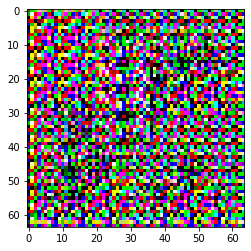

In [9]:
plt.imshow(im[2])